In [ ]:
""" 
Exploratory Data Analysis (EDA)
"""

import sys
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
from wordcloud import WordCloud

try:
    ROOT = Path(__file__).resolve().parents[1]
except NameError:
    ROOT = Path.cwd().parent

if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from config import DATA_RAW

In [25]:
# Load data
df = pd.read_excel(DATA_RAW / "FR_NFR_Dataset.xlsx", engine='openpyxl')
df.rename(columns={"Requirement Text": "requirement"}, inplace=True)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   requirement  6117 non-null   object
 1   Type         6086 non-null   object
dtypes: object(2)
memory usage: 95.7+ KB


In [ ]:
# Length statistics
df["len_text"] = df["requirement"].str.split().str.len()
lengths = df["len_text"].to_numpy()

print("Requirement length statistics:")
print("Minimum:", np.min(lengths))
print("Maximum:", np.max(lengths))
print("Mean:", np.mean(lengths))
print("Median:", np.median(lengths))
print("Standard deviation:", np.std(lengths))
print("Percentiles 25, 50, 75:", np.percentile(lengths, [25, 50, 75]))

Requirement length statistics:
Minimum: 2
Maximum: 58
Mean: 14.757560895863985
Median: 14.0
Standard deviation: 5.3713719739210335
Percentiles 25, 50, 75: [11. 14. 17.]


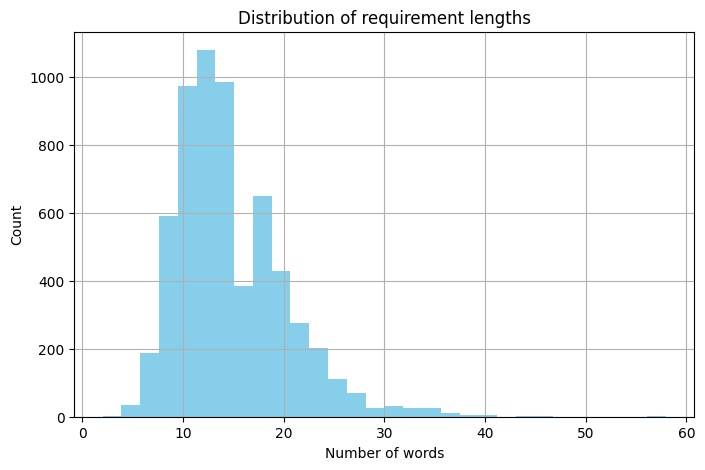

In [ ]:
# General histogram
plt.figure(figsize=(8,5))
df["len_text"].hist(bins=30, color='skyblue')
plt.title("Distribution of requirement lengths")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

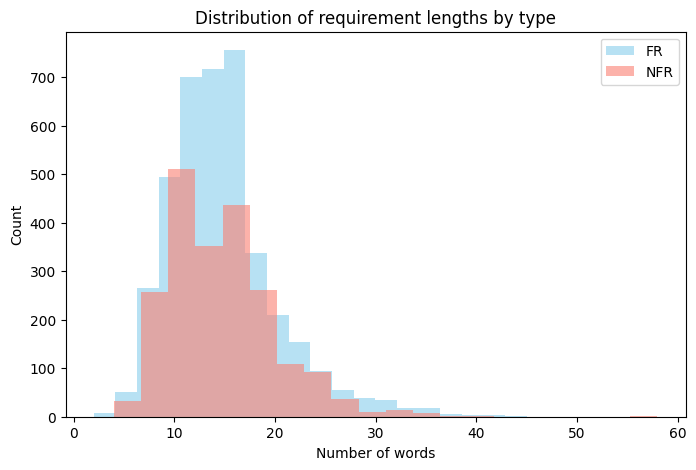

In [ ]:
# Histogram by type
fr_lengths = df[df["Type"]=="FR"]["len_text"].to_numpy()
nfr_lengths = df[df["Type"]=="NFR"]["len_text"].to_numpy()

plt.figure(figsize=(8,5))
plt.hist(fr_lengths, bins=20, alpha=0.6, label="FR", color='skyblue')
plt.hist(nfr_lengths, bins=20, alpha=0.6, label="NFR", color='salmon')
plt.title("Distribution of requirement lengths by type")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.legend()
plt.show()

/tmp/ipykernel_27118/2228329923.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fr_lengths, nfr_lengths], labels=["FR", "NFR"])


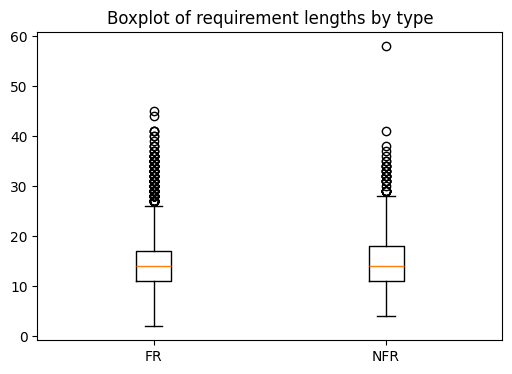

In [ ]:
# Boxplot by type
plt.figure(figsize=(6,4))
plt.boxplot([fr_lengths, nfr_lengths], labels=["FR", "NFR"])
plt.title("Boxplot of requirement lengths by type")
plt.show()

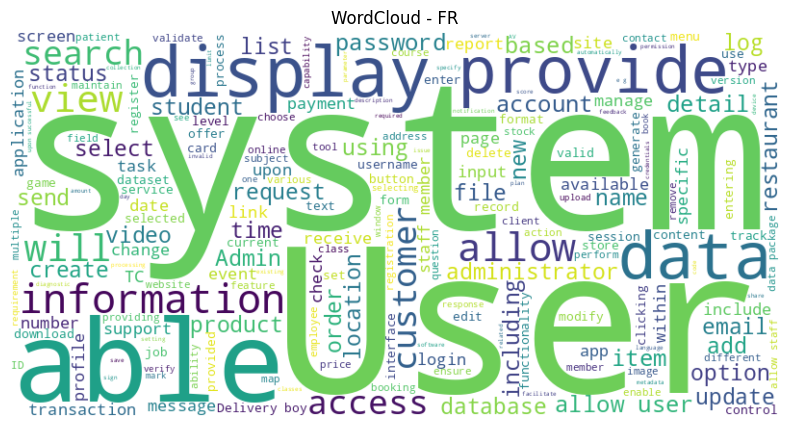

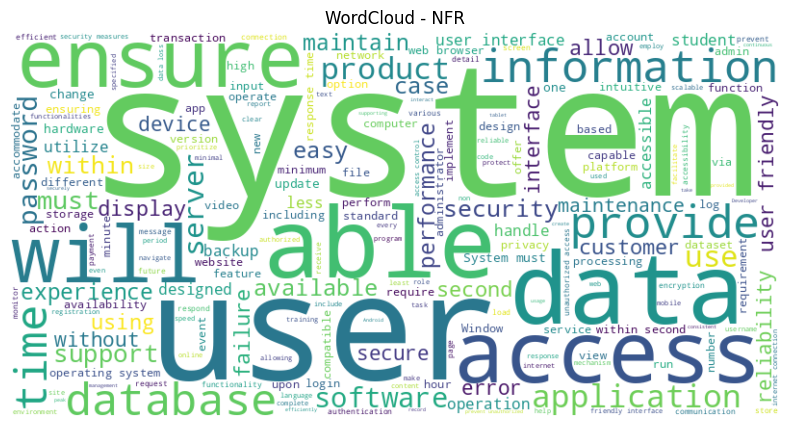

In [ ]:
# WordCloud by class
def plot_wordcloud(text_series, title):
    text = " ".join(text_series)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


plot_wordcloud(df[df["Type"]=="FR"]["requirement"], "WordCloud - FR")
plot_wordcloud(df[df["Type"]=="NFR"]["requirement"], "WordCloud - NFR")

In [ ]:
# Most frequent words by class

def most_common_words(text_series, n=20):
    words = " ".join(text_series).lower().split()
    counter = Counter(words)
    return counter.most_common(n)


print("Top 20 most frequent words - FR:")
print(most_common_words(df[df["Type"]=="FR"]["requirement"]))

print("\nTop 20 most frequent words - NFR:")
print(most_common_words(df[df["Type"]=="NFR"]["requirement"]))

Top 20 most frequent words - FR:
[('the', 4122), ('shall', 3720), ('to', 3065), ('system', 1775), ('and', 1719), ('be', 1704), ('user', 1457), ('a', 1328), ('able', 1323), ('for', 896), ('of', 762), ('allow', 537), ('in', 454), ('on', 433), ('by', 428), ('with', 410), ('their', 380), ('or', 370), ('users', 364), ('data', 304)]

Top 20 most frequent words - NFR:
[('shall', 1809), ('the', 1798), ('system', 1257), ('and', 1087), ('to', 1081), ('be', 851), ('of', 624), ('for', 601), ('user', 559), ('a', 520), ('with', 355), ('in', 287), ('data', 276), ('able', 236), ('users', 211), ('access', 195), ('on', 182), ('or', 176), ('have', 157), ('all', 156)]


In [ ]:
# POS tagging for semantic analysis
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])


def pos_distribution(text_series):
    pos_counter = Counter()
    for doc in nlp.pipe(text_series, batch_size=50):
        pos_counter.update([token.pos_ for token in doc if token.is_alpha])
    return pos_counter


print("POS distribution - FR:")
print(pos_distribution(df[df["Type"]=="FR"]["requirement"]))

print("\nPOS distribution - NFR:")
print(pos_distribution(df[df["Type"]=="NFR"]["requirement"]))

POS distribution - FR:
Counter({'NOUN': 19962, 'VERB': 8360, 'AUX': 6276, 'DET': 6202, 'ADP': 5354, 'ADJ': 4246, 'PART': 2485, 'CCONJ': 2136, 'PROPN': 1752, 'PRON': 721, 'SCONJ': 579, 'ADV': 487, 'NUM': 67, 'X': 25, 'INTJ': 2, 'SYM': 1})

POS distribution - NFR:
Counter({'NOUN': 10954, 'VERB': 3625, 'ADP': 3481, 'AUX': 3350, 'ADJ': 2891, 'DET': 2775, 'CCONJ': 1292, 'PROPN': 956, 'PART': 828, 'ADV': 557, 'PRON': 282, 'SCONJ': 171, 'NUM': 72, 'X': 8, 'INTJ': 2, 'SYM': 2})
